OpenCSP Base Classes and Ray Tracing 
====================================

*Last updated May 17, 2024*

This is a tutorial for using the OpenCSP base classes, which include:
- mirrors
- facets
- facet ensembles
- heliostats
- solar fields (to be renamed heliostat fields)

It will also talk about using ray tracing with these objects.

Geometric Classes
-----------------

OpenCSP uses many homemade classes for representing geomentric objects. These are provided in the `opencsp.common.lib.geometry` module. Some important ones are:

- `Vxyz`, `Pxyz`, `Uxyz`: representing cartesian vectors, points, and unit vectors. `Pxyz` and `Uxyz` extend `Vxyz`. There are 2 dimensional `Vxy` counterparts that are also used similarly.

- `TransformXYZ`: representing some transformation in cartesian space. A transformation can be a rotation, translation, or series of rotations and translations. This class acts on `Vxyz` like objects very easily.

- `RegionXY`: representing some region in 2 dimensional space. These are less important for basic usage but come up sometimes. They are used to specify a convex polygon in 2 dimensions. There are other classes that are used to build regions: `LoopXY`, `EdgeXY`, and `LineXY`.

- `FunctionXYContinuous` and `FunctionXYDiscrete`: representing a function of $x$ and $y$ that is either continuosly defined or defined over some discrete set of outputs. A `FunctionXYContinuous` might be $x^2 + y^2$ while a `FunctionXYDiscrete` might represent an array that only accepts integer $x$ nd $y$ inputs. 

- `Resolution`: represents how points should be chosen. This allows us to define a resolution arbitrarily, then when it is used by some object inside a `RegionXY` the object will resolve the `Resolution` object to be the proper set of points in a grid. To make a `Resolution` you use on of the methods that defines how the resolution should be chosen. 
    - `Resolution.pixelX(n:int)` will create a grid of points that have `n` points in the x direction and the number of points in the y direct that allow for everything to be equispaced.
    - `Resolution.separation(d:float)` will create a grid of points that are all separated in x and y by the distance `d`.
    - `Resoluitions.center()` will always choose the center points for anything that uses this resolution. 
     

While there are others, these are the most important for using the base classes.

Rendering and Render Control classes
------------------------------------

...

The following are some functions that will create figures easily, without having to add the extra information that is used in the real functions. We will use them here to save some space, but in practice it is best to use the rendering that best dispays what you want to show, and provides the most information to your audience.

In [2]:
import opencsp.common.lib.render.figure_management as fm
import opencsp.common.lib.render.view_spec as vs
import opencsp.common.lib.render_control.RenderControlAxis as rca
from opencsp.common.lib.render_control.RenderControlFigure import RenderControlFigure
from opencsp.common.lib.render_control.RenderControlFigureRecord import RenderControlFigureRecord

def quick_plot3d(name: str, fig_control: RenderControlFigure = None, **kwargs) -> tuple[RenderControlFigureRecord, RenderControlFigure]:
    if fig_control is None:
        fig_control = RenderControlFigure(tile_array=(4, 2), tile_square=True)
    fig_record = fm.setup_figure_for_3d_data(fig_control, axis_control=rca.meters(), view_spec=vs.view_spec_3d(), input_prefix="", name=name, title=name, **kwargs)
    return (fig_record, fig_control)


def quick_plotxy(name: str, fig_control: RenderControlFigure = None, tile_array=(4, 2), **kwargs) -> tuple[RenderControlFigureRecord, RenderControlFigure]:
    if fig_control is None:
        fig_control = RenderControlFigure(tile_array=tile_array, tile_square=True)
    return (fm.setup_figure_for_3d_data(fig_control, axis_control=rca.meters(), view_spec=vs.view_spec_xy(), input_prefix="", name=name, title=name, **kwargs), fig_control)


def quick_plotxz(name: str, fig_control: RenderControlFigure = None, **kwargs) -> tuple[RenderControlFigureRecord, RenderControlFigure]:
    if fig_control is None:
        fig_control = RenderControlFigure(tile_array=(4, 2), tile_square=True)
    return (fm.setup_figure_for_3d_data(fig_control, axis_control=rca.meters(), view_spec=vs.view_spec_xz(), input_prefix="", name=name, title=name, **kwargs), fig_control)


def quick_plotyz(name: str, fig_control: RenderControlFigure = None, **kwargs) -> tuple[RenderControlFigureRecord, RenderControlFigure]:
    if fig_control is None:
        fig_control = RenderControlFigure(tile_array=(4, 2), tile_square=True)
    return (fm.setup_figure_for_3d_data(fig_control, axis_control=rca.meters(), view_spec=vs.view_spec_yz(), input_prefix="", name=name, title=name, **kwargs), fig_control)


def quick_plot2d(name: str, fig_control: RenderControlFigure = None, **kwargs) -> tuple[RenderControlFigureRecord, RenderControlFigure]:
    if fig_control is None:
        fig_control = RenderControlFigure(tile_array=(4, 2), tile_square=True)
    return (fm.setup_figure_for_3d_data(fig_control, axis_control=rca.meters(), view_spec=vs.view_spec_im(), input_prefix="", name=name, title=name, **kwargs), fig_control)


Base Classes
------------

These are the core classes that are going to be used by the ray tracing. All base classes inheret from the `OpticOrientationAbstract` class. These represent objects that reflect light and can be oriented in 3d space. All instances of `OpticOrientationAbstract` have a few important characteristics. Some optics hold one or more others (e.g. `FacetEnsemble` holds a list of `Facet` onjects). Each object holds the transformation from its local coordinate frame to its parent if it has a parent, and holds a reference to `None` if it has not parent container object. 

### Mirrors

The most basic set of classes are the mirrors, which all extend the `MirrorAbstract` class. All mirrors have some size, which is defined by a `RegionXY`, and a surface, which is defined depending on the type of mirror. 

The easiest mirror class to use is the `MirrorParametric` class. We can specifically use the `MirrorParametricRectangular` class to avoid defining our own `RegionXY` for now. All we need to do is give it a function for it to use as a surface.

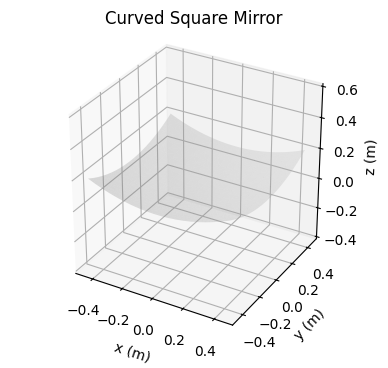

In [3]:
from opencsp.common.lib.csp.MirrorParametricRectangular import MirrorParametricRectangular
from opencsp.common.lib.geometry.FunctionXYContinuous import FunctionXYContinuous

# Using a FunctionXYContinuous has advantages later
surface_function = FunctionXYContinuous("(x**2 + y**2)/(4 * 0.5)")
width = 0.9
height = 0.9

mirror = MirrorParametricRectangular(surface_function, (width, height))

# DRAWING
fig_record,_ = quick_plot3d("Curved Square Mirror")
mirror.draw(fig_record.view)
fig_record.view.show()


You may note that functions of the form 
$\dfrac{x^2 + y^2}{4f}$
are paraboloids that have a focal length $f$. We will use this as a test function often.

We can create other shaped mirrors by using the `RegionXY` class, but it is more involved.

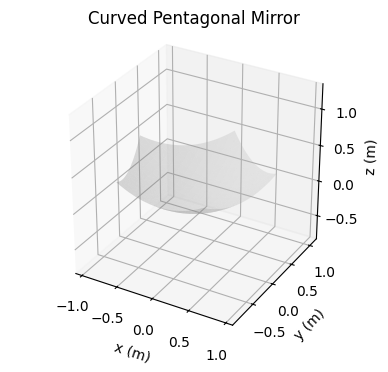

In [4]:
from opencsp.common.lib.geometry.Pxy import Pxy
from opencsp.common.lib.geometry.RegionXY import RegionXY
from opencsp.common.lib.csp.MirrorParametric import MirrorParametric

# Pentagonal mirror, based on a parametric model.
pentagon_vertices = Pxy([[0., -0.95105652, -0.58778525, 0.58778525, 0.95105652],
                         [1., 0.30901699, -0.80901699, -0.80901699, 0.30901699]])
pentagon_region = RegionXY.from_vertices(pentagon_vertices)
mirror_pentagon = MirrorParametric(surface_function, pentagon_region)

# DRAWING
fig_record,_ = quick_plot3d("Curved Pentagonal Mirror")
mirror_pentagon.draw(fig_record.view)
fig_record.view.show()

### Facets

The `Facet` class contains a mirror. As of writing this, the facet **will** represent the way the mirror is mounted to the larger object that contains it, but does not do this yet. It simple requires a mirror and optionally a name to create one. By default when drawing a facet, it only draws an outline about where the facet is. it does not inclusde the mirrors curvature.

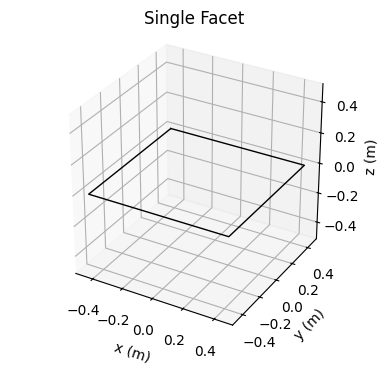

In [5]:
from opencsp.common.lib.csp.Facet import Facet

facet = Facet(mirror)

# DRAWING
fig_record,_ = quick_plot3d("Single Facet")
facet.draw(fig_record.view)
fig_record.view.show()

We could also draw the mirror inside the facet by creating a style for the facet.

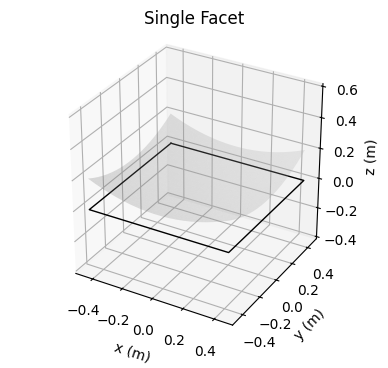

In [6]:
import opencsp.common.lib.render_control.RenderControlFacet as rcf

# DRAWING
fig_record,_ = quick_plot3d("Single Facet")
facet_style = rcf.RenderControlFacet(draw_mirror_curvature=True)
facet.draw(fig_record.view, facet_style)
fig_record.view.show()

### Facet Ensemble

The `FacetEnsemble` class holds a group of facets at predefined distances apart. 

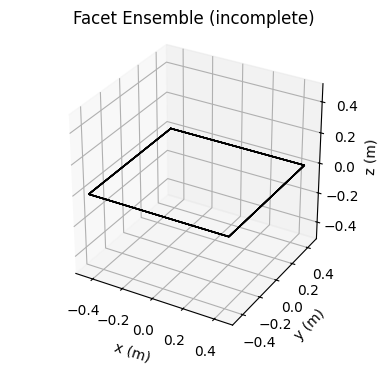

In [7]:
import copy

from opencsp.common.lib.csp.FacetEnsemble import FacetEnsemble

# we can create 9 copies of our facet
many_facets = [copy.deepcopy(facet) for _ in range(9)]
facet_ensemble = FacetEnsemble(many_facets)

# DRAWING
fig_record,_ = quick_plot3d("Facet Ensemble (incomplete)")
facet_ensemble.draw(fig_record.view)
fig_record.view.show()

This looks like it failed, but that is because we have not positioned the facets, so they are currently all located in the same spot. The `FacetEnsemble` represents the collection of facets that are "locked" together, so we need to move them all to some locations. For now, we can just make a grid. We use a `Pxyz` that contains many points to tell it where to put all the facets.

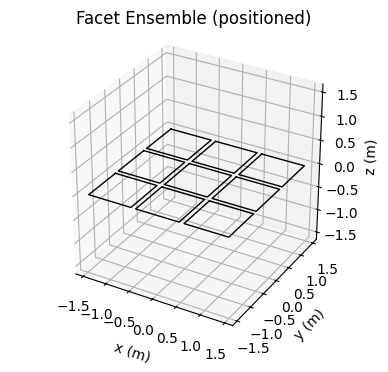

In [8]:
from opencsp.common.lib.geometry.Pxyz import Pxyz

positions = Pxyz([[-1, -1, -1, 0, 0, 0, 1, 1, 1],
                 [-1, 0, 1, -1, 0, 1, -1, 0, 1],
                 [0, 0, 0, 0, 0, 0, 0, 0, 0]])

facet_ensemble.set_facet_positions(positions)


# DRAWING
fig_record,_ = quick_plot3d("Facet Ensemble (positioned)")
facet_ensemble.draw(fig_record.view)
fig_record.view.show()

In real CSP systems with mnultiple mirrirs, they are not just layed flat side-by-side. This is where canting comes in. We can indivudually cant each facet to get the precise canting of a real ensemble of facets, but instead we can just give it an equation to approximately cant to.

### Helisotats

A heliostat contains a facet ensemble and acts in ways that are reminiscent of real world heliostats. All helisotats extend the `HelisotatAbstract` class. We will look at the `HeliostatAzEl` instance as it is the only implemented heliostat class and is a very popular form of heliostat. There are complexities in the implementaion of new heliostat classes that we will not get into right now.

We can demonstrate what a heliostat is by outting our `FacetEnsemble` instance into a heliostat. The origin of a `HeliostatAzEl` is going to be at the point where it is rotating. By default, `HeliostatAzEl` points in the positive-y direction, which is north in ENU coordinates. There is a line coming out of the heliostat to show what direction it is facing.

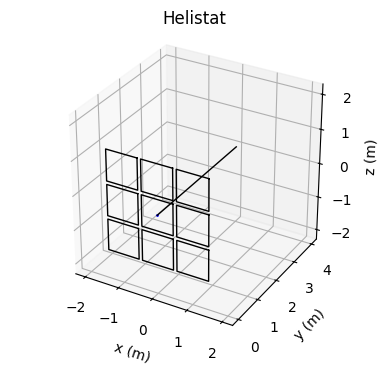

In [9]:
from opencsp.common.lib.csp.HeliostatAzEl import HeliostatAzEl
import opencsp.common.lib.render_control.RenderControlHeliostat as rch

heliostat = HeliostatAzEl(facet_ensemble)

# DRAWING
heliostat_style = rch.normal_facet_outlines()
fig_record,_ = quick_plot3d("Helistat")
heliostat.draw(fig_record.view, heliostat_style)
fig_record.view.show()

A heliostat has a couple imporant things it needs to be able to do:
1. The facets should be able to be canted to better focus light.
2. The heliostat needs to be able to reposition itself so it can track the sun.

We can so both of these things easily. We can set canting manually for each facet, but it is easier for this example to show how we can set the canting by giving the heliostat an equation. For pointing we will just give it a direction to point in the form of a `Vxyz`.

C:\Attempt\Code\wip\OpenCSP\opencsp\common\lib\csp\OpticOrientationAbstract.py:160: UserWarning: this function has not been verified
  warn("this function has not been verified")


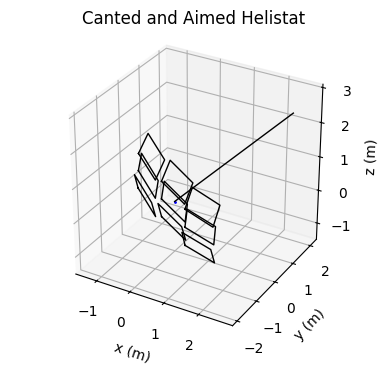

In [10]:
from opencsp.common.lib.geometry.Vxyz import Vxyz


canting_function = FunctionXYContinuous("(x**2 + y**2)/(4*2)")
heliostat.set_canting_from_equation(canting_function)

heliostat.set_orientation_from_pointing_vector(Vxyz([10, 5, 10]))

# DRAWING
heliostat_style = rch.normal_facet_outlines()
fig_record,_ = quick_plot3d("Canted and Aimed Helistat")
heliostat.draw(fig_record.view, heliostat_style)
fig_record.view.show()

All of the steps taken to get here start to add up. There is an easier way to create heliostats that are already defined. If there is a csv file for an Azumuth-Elevation heliostat like [`../../opencsp/common/lib/test/data/input/sandia_nsttf_test_definition/NSTTF_Heliostats_origin_at_torque_tube.csv`](../../opencsp/common/lib/test/data/input/sandia_nsttf_test_definition/NSTTF_Heliostats_origin_at_torque_tube.csv) and a characterization csv where all the facets are, like in[`../../opencsp/common/lib/test/data/input/sandia_nsttf_test_definition/NSTTF_Facet_Centroids.csv`](../../opencsp/common/lib/test/data/input/sandia_nsttf_test_definition/NSTTF_Facet_Centroids.csv) then we can just create heliostats from these files. Since the heliostats are named in the files we can just give the name of the heliostat we want and OpenCSP will make it for us.

The function for the `HeliostatAzEl` from csv files also takes in a `mirror_template` which copies a single mirror for each facet. This function also returns the location of the heliostat separately. Since a heliostat does not hold its own position until it is placed inside a parent object, this location can be used after the heliostat is put inside something larger. 

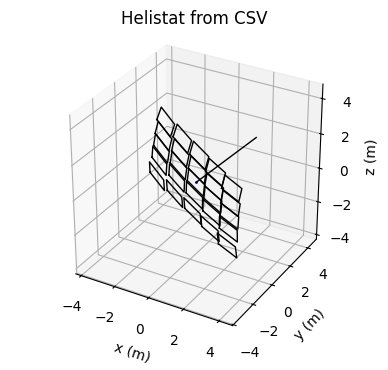

In [11]:
# This import holds the files mentioned above in code.
# This means the location you run from does not matter.
import opencsp.common.lib.opencsp_path.data_path_for_test as dpft

mirror_template_function = FunctionXYContinuous("(x**2 + y**2)/(4*10)")
mirror_template = MirrorParametricRectangular(mirror_template_function, (1.2, 1.2))

heliostat_5W1, heliostat_5W1_location = HeliostatAzEl.from_csv_files("5W1", 
                                            dpft.sandia_nsttf_test_heliostats_origin_file(),
                                            dpft.sandia_nsttf_test_facet_centroidsfile(),
                                            mirror_template)

heliostat_5W1.set_canting_from_equation(mirror_template_function)
heliostat_5W1.set_orientation_from_pointing_vector(Vxyz([10, 5, 10]))

# DRAWING
heliostat_style = rch.normal_facet_outlines()
fig_record,_ = quick_plot3d("Helistat from CSV")
heliostat_5W1.draw(fig_record.view, heliostat_style)
fig_record.view.show()

Voila!

### *Intermission: Drawing Optics*

Now that we have some of the optics defined we can play around with how to analyze them in ways that might be useful. First of all, if we look at our `heliostat_5W1` from the last code block, we can find that all of the facets are named.

In [12]:
# printing each facet name separated by "; "
for facet_in_fe in heliostat_5W1.facet_ensemble.facets:
    print(facet_in_fe.name, end='; ')

1; 2; 3; 4; 5; 6; 7; 8; 9; 10; 11; 12; 13; 14; 15; 16; 17; 18; 19; 20; 21; 22; 23; 24; 25; 

This means we can target specific facets. One way we might want to target a facet is by coloring it differently in our plot. We can do this with the `add_special_style()` function in the `RenderControlFacetEnsemble` render control. Here we can make the facet named "7" draw as red instead of the defalt black.

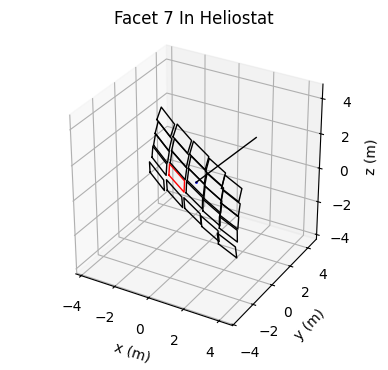

In [13]:
# DRAWING
heliostat_style = rch.normal_facet_outlines()
heliostat_style.facet_ensemble_style.add_special_style("7", rcf.outline('red'))

fig_record,_ = quick_plot3d("Facet 7 In Heliostat")
heliostat_5W1.draw(fig_record.view, heliostat_style)
fig_record.view.show()

If we want to specifically draw that facet, without the rest of the heliostat we can do a lookup and just draw that facet. By default the facet is drawn in the reference frame of the most top level optic it is a part of.

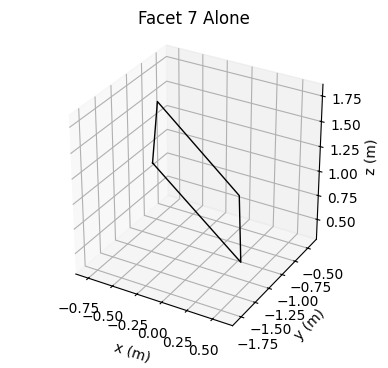

In [14]:
facet7 = heliostat_5W1.lookup_facet("7")

# DRAWING
fig_record,_ = quick_plot3d("Facet 7 Alone")
facet7.draw(fig_record.view)
fig_record.view.show()

If you look at this image you will see that facet 7 is still facing the same direction it was facing, and it is not centered at the origin. We can draw this facet in any position that we wish. The most obvious might just be to draw it facing up. The default orientation for a facet is up so we want to give the `draw` function the identity transformation, which will give us an unrotated facet at the origin. 

Most `draw` functions have the form:
```python 
def draw(self:OpticOrientationAbstract, render_control, transformation) 
```
This transform in the draw function **DOES NOT MUTATE** the optic. It only allows you to view the optic from a different direction. We took care not to design the code so it should be clear when there are mutations that last. 

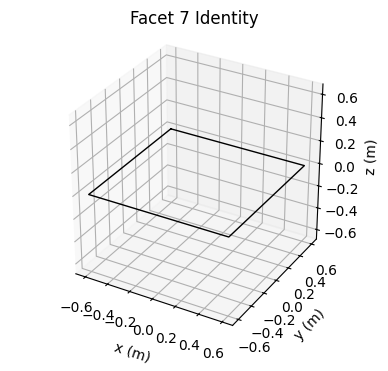

In [15]:
from opencsp.common.lib.geometry.TransformXYZ import TransformXYZ

# DRAWING
fig_record,_ = quick_plot3d("Facet 7 Identity")
facet7.draw(fig_record.view, transform=TransformXYZ.identity())
fig_record.view.show()

### Solar Fields (to be renamed Heliostat Fields)

The `SolarField` class contains a collection of `HeliostatAbstract` instances. They represent a location on earth, so they also have a longitude and latitude associated with them. *(The code uses (longitude, latitude) instead of the standard (lat, lon). This was a design decision but can cause confusion and there are many arguments for changing it, however this would be an undertaking.)* We can make a `SolarField` using the constructor and a list of heliostats.

I will import a module that includes specific longitude and latitude coordinates for NSTTF, but it is just a `tuple[float, float]` where each float is the coordinates.

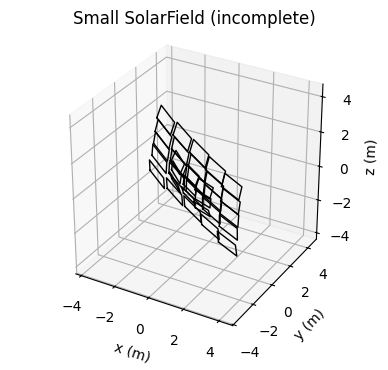

In [16]:
import opencsp.common.lib.geo.lon_lat_nsttf as lln
from opencsp.common.lib.csp.SolarField import SolarField

# we can make a fiels with the two heliostats we made earlier
list_of_heliostats = [heliostat_5W1, heliostat]
solar_field = SolarField(list_of_heliostats,
                         origin_lon_lat=lln.NSTTF_ORIGIN)

# DRAWING
fig_record,_ = quick_plot3d("Small SolarField (incomplete)")
solar_field.draw(fig_record.view)
fig_record.view.show()

Once again we see that the optics need to be positioned. Earlier when we built `heliostat_5W1` we also got the accosiated `heliostat_5W1_location`. We will just choose to place the other heliostat at $(0, 50, 0)$.

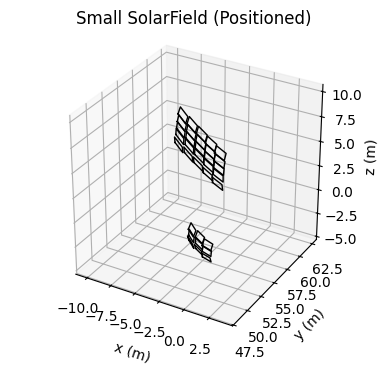

In [17]:
helisotat_positions = [heliostat_5W1_location, Pxyz([0, 50, 0])]
solar_field.set_heliostat_positions(helisotat_positions)

# DRAWING
fig_record,_ = quick_plot3d("Small SolarField (Positioned)")
solar_field.draw(fig_record.view)
fig_record.view.show()

Similarly to how the heliostats were able to be build by csv files, so can the solar field. **At the moment this solar field is limited by the fact that is created all heliostats with flat mirrors and no canting. This must be manually altered to really be accurate to a real solar field.**

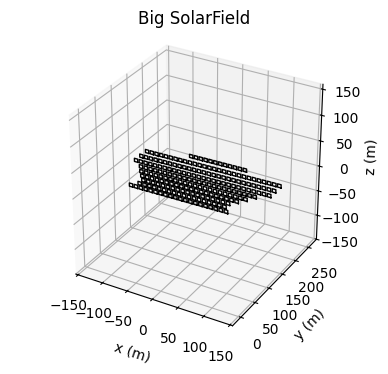

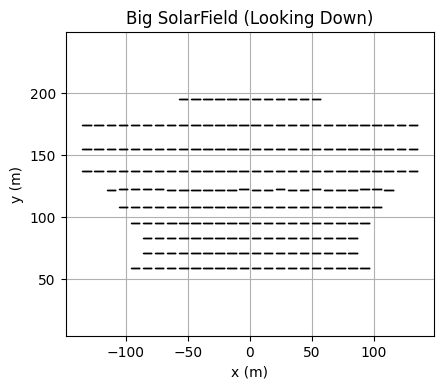

In [18]:
import opencsp.common.lib.render_control.RenderControlSolarField as rcsf

solar_field_nsttf = SolarField.from_csv_files(lln.NSTTF_ORIGIN, 
                                              dpft.sandia_nsttf_test_heliostats_origin_file(),
                                              dpft.sandia_nsttf_test_facet_centroidsfile())


# DRAWING 3D
solar_field_style = rcsf.heliostat_outlines()
fig_record,_ = quick_plot3d("Big SolarField")
solar_field_nsttf.draw(fig_record.view, solar_field_style)
fig_record.view.show()

# DRAWING LOOKING DOWN
fig_record,_ = quick_plotxy("Big SolarField (Looking Down)")
solar_field_nsttf.draw(fig_record.view, solar_field_style)
fig_record.view.show()

With the solar field built we can set all heliostats to track the sun at some time and aim to some point we want to focus on. Lets aim all the heliostas at $(0, 8, 30)$. The time is presented in the format:  \
`(year, month, day, hour, minute, second, time_zone_number)`. The time should be a `tuple`.

We can also draw the point we are aiming at.

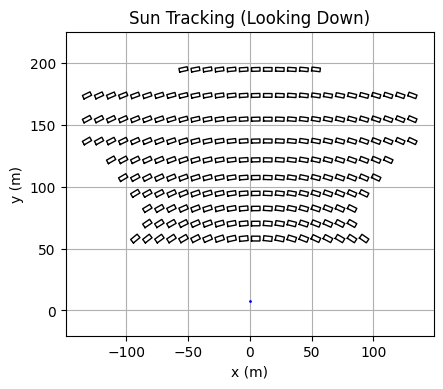

In [19]:
aimpoint = Pxyz([0, 8, 30])

# 1:00:00 PM on March 1, 2024 at a location 6 hours behind the international time
time = (2024, 3, 1, 13, 0, 0, -6)

solar_field_nsttf.set_full_field_tracking(aimpoint, time)

# DRAWING LOOKING DOWN and AIMPOINT
fig_record,_ = quick_plotxy("Sun Tracking (Looking Down)")
solar_field_nsttf.draw(fig_record.view, solar_field_style)
fig_record.view.draw_single_Pxyz(aimpoint)
fig_record.view.show()

If we set the time to be earlier in the day we will see that all the heliostats move. Lets set the time to be 8:00 AM and see how the field responds. Changing the time and predicting how this will affect the field might be a good little bit of practice. 

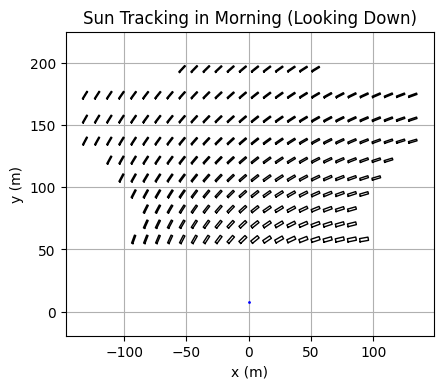

In [20]:
# 8:00:00 AM on March 1, 2024 at a location 6 hours behind the international time
time = (2024, 3, 1, 8, 0, 0, -6)

solar_field_nsttf.set_full_field_tracking(aimpoint, time)

# DRAWING LOOKING DOWN and AIMPOINT
fig_record,_ = quick_plotxy("Sun Tracking in Morning (Looking Down)")
solar_field_nsttf.draw(fig_record.view, solar_field_style)
fig_record.view.draw_single_Pxyz(aimpoint)
fig_record.view.show()

And of course using the same trick to look at individual facets we can look at individual heliostats in the solar field. If you only want to use certain heliostats you might want to not build the whole field since it can take some time.

Ray Tracing
-----------

The algorithm used for ray tracing is explained in detail in [ReflectedRayAlgorithm.pdf](../../doc/common/lib/csp/ReflectedRayAlgorithm.pdf). 

OpenCSP ray tracing requires many points, the normal vectors at those points (to know how light sohuld reflect) and a light source. Any `RayTraceable` object will have a `survey_of_points` function. This function will give a list of points and normal vectors at those points for a given `Resolution`.

### Light Sources

Light sources are children of the abstract class `LightSourceAbstract`. Light sources represent an object that produces light. The simplest example is the `LightSourcePoint` which represents a point source of light. Here we can make a point source of light at the position $(0, 0, 0.5)$, which is the focal length of the original mirror we made.

In [21]:
from opencsp.common.lib.csp.LightSourcePoint import LightSourcePoint

point_source = LightSourcePoint(Pxyz([0, 0, 0.5]))

### Scenes

Scenes hold optic objects and light sources. The optics are `OpticOrientationAbstract` and `RayTraceable` objects while the light sources are `LightSourceAbstract` objects. 

We can create a scene that holds our original 5 meter focal length mirror from the Mirror section of this document. We can also add our point source. We do want to be careful since some of the things we have made have been put into parent objects. The library tries to catch mistakes but we still want to avoid having multiple things "own" a smaller object.

In [22]:
print("Mirror Owner: ", mirror.parent)
print("Facet Owner: ", facet.parent)

Mirror Owner:  <opencsp.common.lib.csp.Facet.Facet object at 0x0000026083F8DCC0>
Facet Owner:  None


So `facet` is not owned by anything, so we can put it in the scene.

In [23]:
from opencsp.common.lib.csp.Scene import Scene

scene = Scene()
scene.add_object(facet)
scene.add_light_source(point_source)

Now we have a `Scene` object which is step one for ray tracing.

### *Intermission: Using Scenes to Position Optics*

Scenes are useful for another purpose. Say I want to test something with a mirror, but I want to move it so a location that is not at the origin. One option is to put that mirror into a `Facet`, then put that `Facet` into a `FacetEnsemble` to move around, but that is both more work than is necissary and is somwhat of an abuse of the goal of a `FacetEnsemble` as a concept. We can use `Scene`s to position objects.

If we take our pentagonal mirror from earlier, we can position it however we like.

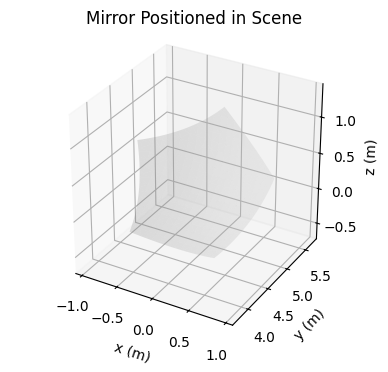

In [24]:
from scipy.spatial.transform import Rotation

PI = 3.14

scene_for_positioning = Scene()
scene_for_positioning.add_object(mirror_pentagon)

# lets rotate the mirror 45 degrees about its x axis then
# move it  5 meters in the y direction (North).
rotation = TransformXYZ.from_R(Rotation.from_euler('x', PI / 4))
translation = TransformXYZ.from_V(Vxyz([0, 5, 0]))
full_transform = translation * rotation

scene_for_positioning.set_position_in_space(mirror_pentagon, full_transform)

# DRAWING
fig_record, _ = quick_plot3d("Mirror Positioned in Scene")
mirror_pentagon.draw(fig_record.view)
fig_record.view.show()

And now the mirror is positioned how we want it!

### `RayTrace` Class 

After objects and a light source are in the scene we can perform a ray trace with the `RayTrace` class. When we perform a ray trace with `trace_scene` we must give it a `Scene` to trace and a resolution that it should use for the objects in the scene. If there is only one object then using `Resolution.pixelX(n:int)` is helpful since it is easy to know how many rays will be present. However if there are more onjects of varyying sizes `Resolution.separation(d:float)` will gaurantee some level of equality between the objects being traced.

We can draw a `RayTrace` object like we can the base classes. Here we want to see the rays traveling so we will specifically use a render control object (`RenderControlRayTrace`) to set the lengths of the outgoing light.

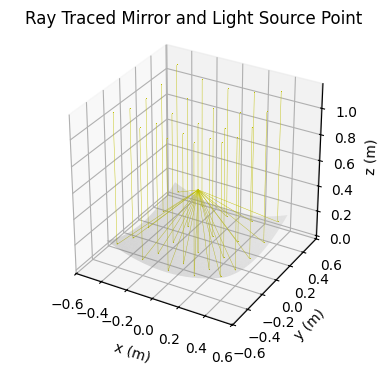

In [72]:
import opencsp.common.lib.csp.RayTrace as rt
import opencsp.common.lib.render_control.RenderControlRayTrace as rcrt
from opencsp.common.lib.geometry.RegionXY import Resolution

point_source.location_in_space = Pxyz([0,0,0.5])

trace = rt.trace_scene(scene, 
                       obj_resolution=Resolution.separation(0.2))

# DRAWING
fig_record, _ = quick_plot3d("Ray Traced Mirror and Light Source Point")
facet.draw(fig_record.view, rcf.normal_mirror_surface())
trace.draw(fig_record.view)
fig_record.view.show()

The result of a point source producing light at a parabolic mirrors focal point is that all the reflected beams will be parallel to the mirror's normal vector. <a id='raytrace-class'></a>

We can change the light source to be at 2 times the focal length of the mirror we will see a different result. For this we place the light source at $(0, 0, 1)$.

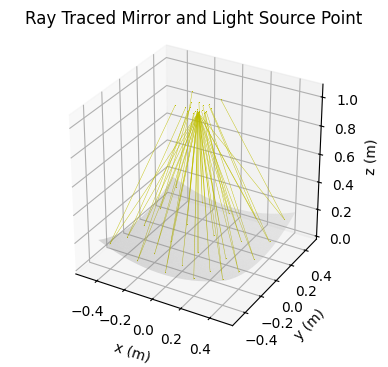

In [71]:
point_source.location_in_space = Pxyz([0,0,1])

trace2 = rt.trace_scene(scene, 
                       obj_resolution=Resolution.separation(0.2))

# DRAWING
fig_record, _ = quick_plot3d("Ray Traced Mirror and Light Source Point")
facet.draw(fig_record.view, rcf.normal_mirror_surface())
trace2.draw(fig_record.view)
fig_record.view.show()

Here the beams return to a similar point as the origin of the beam. This is beacause a parabolois aproximates a sphere of radius $2f$ close to its optical axis.

### Sun Object

For concentrating *solar* power we want to be able to see how the solar field responds to the sun. For this we use the `LightSourceSun` class to create a sun for the scene. The sun is an interesting light source, since it is far enough away that any two observers on earth will see it about the same if they are neaby eachother. The sun's light is not all parallel, and looks more like a cone. When creating a `LightSourceSun` object we will want to decide how many rays from the sun there will be. This is done by giving a single `int` $n$ and that will become and $n \times n$ grid of points. A circle is then drawn centered in the grid of points and all points outside the grid are removed. 

We will use the solar field we created earlier as out ray traced object. 

C:\Users\tjlarki\AppData\Local\Temp\ipykernel_24364\1596438753.py:10: DeprecationWarning: LightSourceSun.set_incident_rays is deprecated. Use initialize_from_solar_position instead.
  sun.set_incident_rays(solar_field_nsttf.origin_lon_lat,


Rotating sun rays...
Sun rays are initialized

Setting up Ray Trace...
getting survey...
...got survey
Beginning Ray Trace...
10.00% through tracing. Using 33.8% of system RAM.
20.00% through tracing. Using 33.8% of system RAM.
30.00% through tracing. Using 33.8% of system RAM.
40.00% through tracing. Using 33.8% of system RAM.
50.00% through tracing. Using 33.9% of system RAM.
60.00% through tracing. Using 33.9% of system RAM.
70.00% through tracing. Using 33.9% of system RAM.
80.00% through tracing. Using 33.9% of system RAM.
90.00% through tracing. Using 33.9% of system RAM.


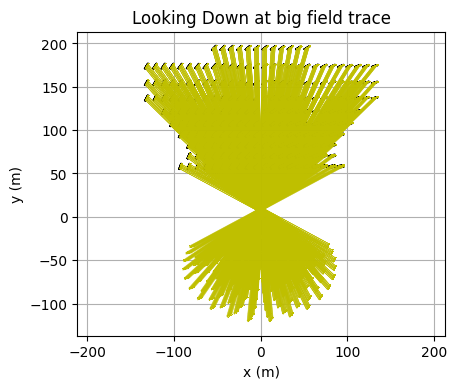

In [27]:
import datetime
from zoneinfo import ZoneInfo
from opencsp.common.lib.csp.LightSourceSun import LightSourceSun

# time_zone = ZoneInfo("America/Denver")
# sun = LightSourceSun.from_location_time(solar_field_nsttf.origin_lon_lat,
#                                         datetime.datetime(2024, 3, 1, 8, 0, 0, tzinfo=time_zone),
#                                         1)
sun = LightSourceSun()
sun.set_incident_rays(solar_field_nsttf.origin_lon_lat,
                      time,
                      1,) # we set the sun to only have one beam

solar_field_nsttf._parent = None
scene_with_sun = Scene()
scene_with_sun.add_object(solar_field_nsttf)
scene_with_sun.add_light_source(sun)

trace_with_sun = rt.trace_scene(scene_with_sun, 
                                obj_resolution=Resolution.center(),
                                verbose=True) # we can set the verbose flag to be true to see the progress

# DRAWING
fig_record, _ = quick_plotxy("Looking Down at big field trace")
solar_field_nsttf.draw(fig_record.view)
trace_with_sun.draw(fig_record.view, rcrt.init_current_lengths(current_len=200))
fig_record.view.show()

As Expected the light all converges to the `aimpoint` we set when we told the field where to track.

<h3 color = "red">... <i>TODO:</i> show the use of off-axis canting ...</h3>

Flux Maps
---------

Now we want to use some of the analysis tools that are provided as part of the RayTrace class. There is/will be a separate package that does spot analysis, so we might want to produce spot images or python objects that represent the location that our ray trace intersects with some target.

### Intersections

The intersection algorithm is explained in [IntersectionWithPlaneAlgorithm.pdf](../../doc/common/lib/csp/IntersectionWithPlaneAlgorithm.pdf)

We want to know where the individual light rays intersect with some plane. We can use the ray traces from earlier: `trace` and `trace2` from the [`RayTrace` section](#raytrace-class). These are small ray traces, but we might want to analyse exactly where the rays intersect. Lets say we want to know how the reflections intersect with the $xy$ plane at $z=1$. We will have the first one be blue(where the point light source was at the focal point)  and the second one be red (where the light source was about at the $2f$ point). 

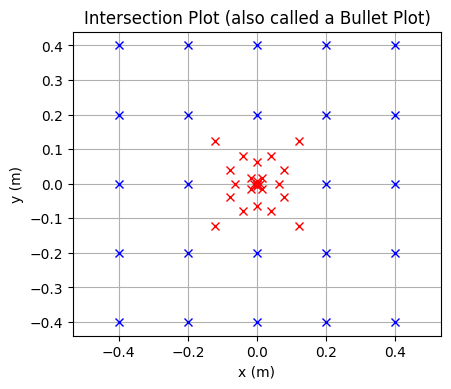

In [74]:
from opencsp.common.lib.geometry.Intersection import Intersection
import opencsp.common.lib.render_control.RenderControlPointSeq as rcps

# The plane is a point the plane passes through and the plane's normal vector, here it is the down unit vector
plane = (Pxyz([0,0,1]), Vxyz([0,0,-1]))

intersection1 = Intersection.plane_intersect_from_ray_trace(trace, plane)
intersection2 = Intersection.plane_intersect_from_ray_trace(trace2, plane)

# DRAWING
style1 = rcps.RenderControlPointSeq(color='b')
style2 = rcps.RenderControlPointSeq(color='r')

fig_record, _ = quick_plotxy("Intersection Plot (also called a Bullet Plot)")
intersection1.draw(fig_record.view, style1)
intersection2.draw(fig_record.view, style2)
fig_record.view.show()

As we expect, the blue dots are all spaced evenly since they travel parallel from evenly spaced points on the mirror. Meanwhile the red dots ar focused around the points $(0,0,1)$ since the source was at 2 times the focal point. If the mirror had a larger focal length and we did this again we would see the points get close to the center. **I recommend trying to make a plot that demonstrates this if you want to try it out!**

***Note:** that we use* `quickplotxy` *since the plane is in the xy direction.*

### Creating Flux Maps as Functions

Intersections can show a lot about the way an optic is reflecting light, but they are not very realistic. In reality we cannot see the individual points that rays hit targets. We want to be able to produce images that look more like the real things we can see and take pictures of.

C:\Users\tjlarki\AppData\Local\Temp\ipykernel_24364\4189834759.py:7: DeprecationWarning: LightSourceSun.set_incident_rays is deprecated. Use initialize_from_solar_position instead.
  sun3.set_incident_rays(solar_field_nsttf.origin_lon_lat,


Rotating sun rays...
Sun rays are initialized

Setting up Ray Trace...
getting survey...
...got survey
Beginning Ray Trace...
10.00% through tracing. Using 37.4% of system RAM.
20.00% through tracing. Using 37.5% of system RAM.
30.00% through tracing. Using 37.5% of system RAM.
40.00% through tracing. Using 37.6% of system RAM.
50.00% through tracing. Using 37.6% of system RAM.
60.00% through tracing. Using 37.6% of system RAM.
70.00% through tracing. Using 37.6% of system RAM.
80.00% through tracing. Using 37.7% of system RAM.
90.00% through tracing. Using 37.8% of system RAM.


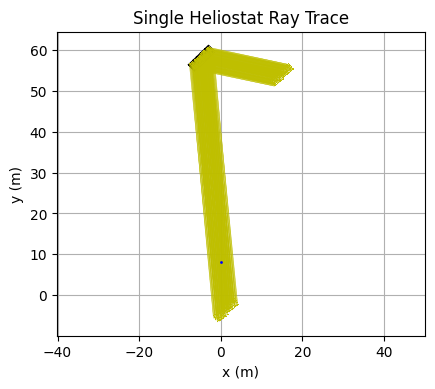

In [66]:
single_heliostat = solar_field_nsttf.lookup_heliostat("5W1").no_parent_copy()
single_heliostat_location = solar_field_nsttf.lookup_heliostat("5W1")._self_to_parent_transform

sun3 = LightSourceSun()
sun3.set_incident_rays(solar_field_nsttf.origin_lon_lat,
                      time,
                      20,)

scene3 = Scene()
scene3.add_light_source(sun3)
scene3.add_object(single_heliostat)
scene3.set_position_in_space(single_heliostat, single_heliostat_location)

trace3 = rt.trace_scene(scene3, Resolution.separation(0.15), verbose=True)

# DRAWING
fig_record, _ = quick_plotxy("Single Heliostat Ray Trace")
single_heliostat.draw(fig_record.view, )
trace3.draw_subset(fig_record.view, 200, rcrt.init_current_lengths(init_len=20, current_len=70))
fig_record.view.draw_single_Pxyz(aimpoint)
fig_record.view.show()

The result from this trace is less than ideal. The heliostat does not seem to really focus the light. We can fix this by performing canting. We can take the location of the heliostat and the aimpoint and the distance between them can become the focal length we cant the heliostat with.

C:\Attempt\Code\wip\OpenCSP\opencsp\common\lib\csp\OpticOrientationAbstract.py:160: UserWarning: this function has not been verified
  warn("this function has not been verified")


Setting up Ray Trace...
getting survey...
...got survey
Beginning Ray Trace...
10.01% through tracing. Using 37.2% of system RAM.
20.03% through tracing. Using 37.2% of system RAM.
30.04% through tracing. Using 37.3% of system RAM.
40.05% through tracing. Using 37.3% of system RAM.
50.00% through tracing. Using 37.3% of system RAM.
60.01% through tracing. Using 37.3% of system RAM.
70.03% through tracing. Using 37.4% of system RAM.
80.04% through tracing. Using 37.4% of system RAM.
90.05% through tracing. Using 37.4% of system RAM.


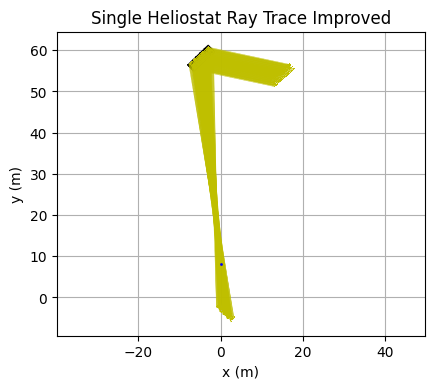

In [65]:
heliostat_origin = single_heliostat_location.apply(Pxyz.origin())

distance = (heliostat_origin - aimpoint).magnitude()[0]

heliostat_canting_function = FunctionXYContinuous(f"(x**2 + y**2)/(4*{distance})")
single_heliostat.set_canting_from_equation(heliostat_canting_function)

trace4 = rt.trace_scene(scene3, Resolution.separation(0.15), verbose=True)

# DRAWING
fig_record, _ = quick_plotxy("Single Heliostat Ray Trace Improved")
single_heliostat.draw(fig_record.view, )
trace4.draw_subset(fig_record.view, 200, rcrt.init_current_lengths(init_len=20, current_len=70))
fig_record.view.draw_single_Pxyz(aimpoint)
fig_record.view.show()

This looks better, but it is still not great since focusing a heliostat using the distance as the focal length only produces ideal results when the sun is lined up with the aimpoint. We can look at the traces in another way. 

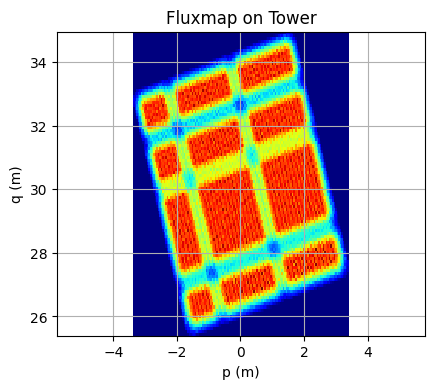

In [67]:

NORTH = Vxyz([0, 1, 0])
plane = (aimpoint, NORTH)

intersection3 = Intersection.plane_intersect_from_ray_trace(trace3, plane)
flux3 = intersection3.to_flux_mapXZ(100)

# DRAWING
fig_record, _ = quick_plot2d("Fluxmap on Tower")
flux3.draw(fig_record.view, )
fig_record.view.show()

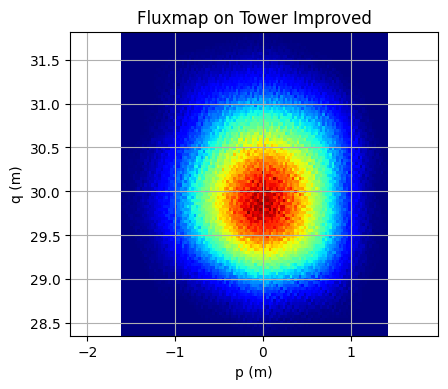

In [68]:

intersection4 = Intersection.plane_intersect_from_ray_trace(trace4, plane)
flux4 = intersection4.to_flux_mapXZ(100)

# DRAWING
fig_record, _ = quick_plot2d("Fluxmap on Tower Improved")
flux4.draw(fig_record.view, )
fig_record.view.show()

Like drawing anything else we can alter the way we want to view it with a render control object. In this case we store the flux map as a `FunctionXYGrid`, which is essentially just an array but with scaled and tranlated indicies. The actual flux map is naturally colored in (we use `cmap="jet"` by default) so we can change the color map to make it look a little nice. We can then also scale the colors and sizes of the images to compare them more effectively.

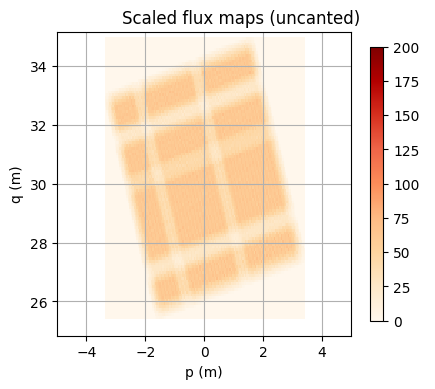

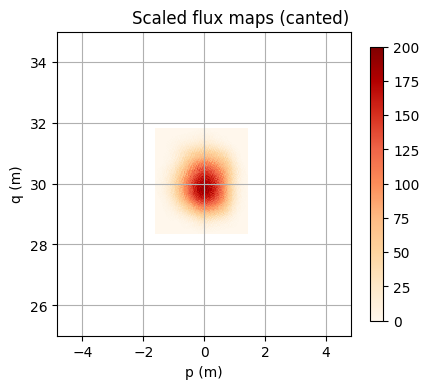

In [69]:
import opencsp.common.lib.render_control.RenderControlFunctionXY as rcfn

# DRAWING 
function_style = rcfn.RenderControlFunctionXY(draw_heatmap=True,
                                              colorbar=True,
                                              cmap="OrRd",
                                              colorbar_min_max=(0, 200))

fig_record, _ = quick_plot2d("Scaled flux maps (uncanted)")
flux3.draw(fig_record.view, function_style)
fig_record.view.show(x_limits = (-5, 5), y_limits = (25, 35))


fig_record, _ = quick_plot2d("Scaled flux maps (canted)")
flux4.draw(fig_record.view, function_style)
fig_record.view.show(x_limits = (-5, 5), y_limits = (25, 35))

Another valuable thing we can do is draw the contour lines around the flux maps. These might be usefule themselves but even more likely they could be placed over an image of real life for comparison.

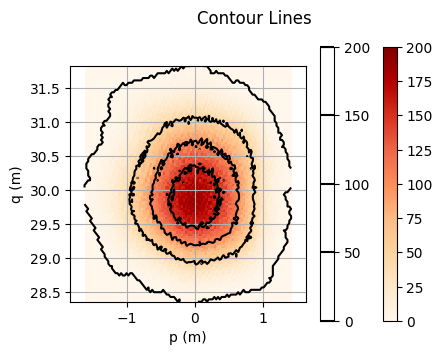

In [70]:
# DRAWING 
function_style = rcfn.RenderControlFunctionXY(draw_heatmap=True,
                                              colorbar=True,
                                              cmap="OrRd",
                                              draw_contours=True,
                                              colorbar_min_max=(0, 200))


fig_record, _ = quick_plot2d("Contour Lines")
flux4.draw(fig_record.view, function_style)
fig_record.view.show()